In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import math

### Importing the data

In [2]:
data = pd.read_excel('Simplified_Commuting_Data.xlsx')
data_out_of_LA = data[["Workplace County.1","Commuters.1"]]
data_out_of_LA.head(10)

Workplace County.1  Commuters.1
0       Alameda County         1003
1        Amador County           11
2         Butte County           61
3  Contra Costa County          360
4     El Dorado County          133
5        Fresno County          502
6      Humboldt County          178
7      Imperial County          212
8          Inyo County          101
9          Kern County         7522

### Checking the new data frame

In [3]:
data_into_LA = data[["Home County","Commuters"]]
data_into_LA.head(10)

Home County  Commuters
0       Alameda County        732
1        Amador County         56
2         Butte County         41
3  Contra Costa County        681
4     El Dorado County        146
5        Fresno County        758
6      Humboldt County         69
7      Imperial County        167
8          Inyo County         14
9          Kern County       8922

### Creating a star graph as a template for the rest of the group

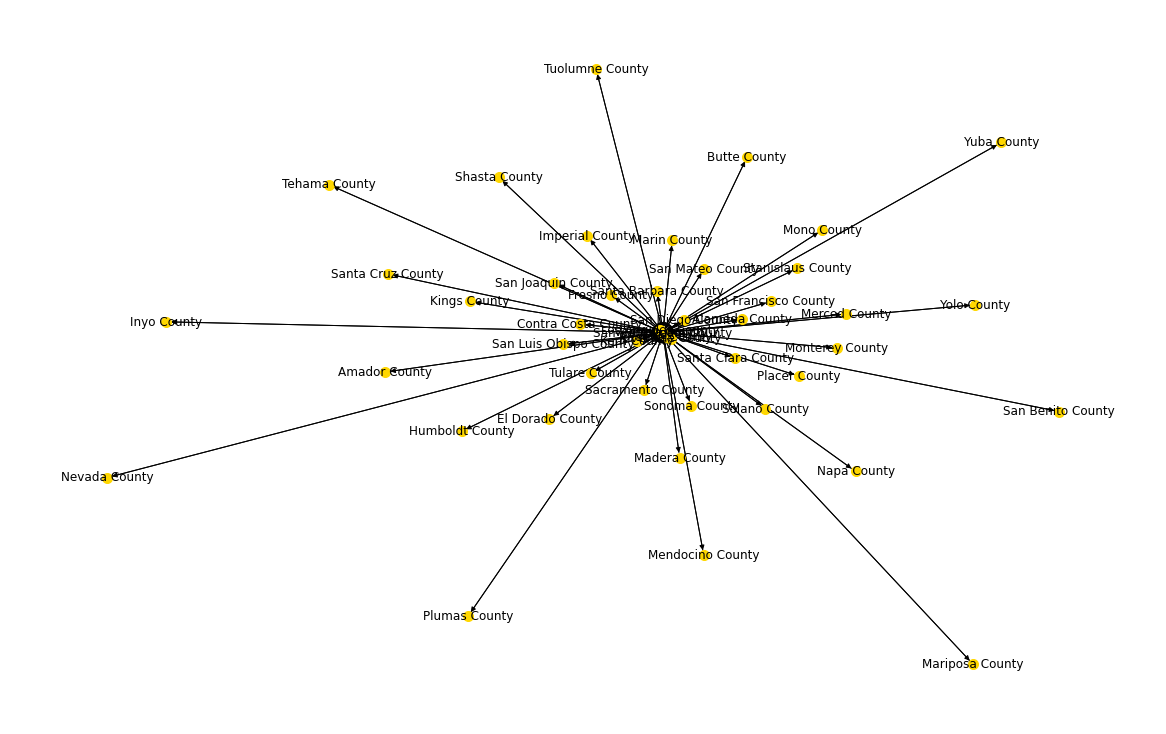

In [4]:
network_LA_star = nx.DiGraph()

# Weighted edges coming out of LA County 
for i in range(len(data_out_of_LA)): 
    network_LA_star.add_weighted_edges_from([("LA County",data_out_of_LA["Workplace County.1"][i], data_out_of_LA["Commuters.1"][i])])

# Weighted edges coming into LA County 
for i in range(len(data_into_LA)): 
    network_LA_star.add_weighted_edges_from([(data_into_LA["Home County"][i], "LA County", data_into_LA["Commuters"][i])])
    
plt.rcParams["figure.figsize"] = [16, 10]
pos=nx.spring_layout(network_LA_star,scale=10)
nx.draw(network_LA_star,node_size = 100, node_color = "gold", with_labels = True)

### Getting the degree of a node with weighted edges

In [5]:
weights = pd.DataFrame(network_LA_star.degree(weight='weight'))
weights.head(10)

0        1
0            LA County  9147168
1       Alameda County     1735
2        Amador County       67
3         Butte County      102
4  Contra Costa County     1041
5     El Dorado County      279
6        Fresno County     1260
7      Humboldt County      247
8      Imperial County      379
9          Inyo County      115